In [1]:
%matplotlib inline

In [1]:
import pandas as pd
from skimage import io
import numpy as np
import os
import re
from PIL import Image

#setup a standard image size; this will distort some images but will get everything into the same shape
STANDARD_SIZE = (300, 167)

In [3]:

def read_img_to_matrix(filename, verbose=False):
    """
    takes a filename and turns it into a numpy array of RGB pixels
    """
    img = Image.open(filename)
    if verbose==True:
        #print ("changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE)))
        img = img.resize(STANDARD_SIZE)
    img = list(img.getdata())
    #img = map(list, img)
    img = np.array(img)
    return img

def flatten_image(img):
    """
    takes in an (m, n) numpy array and flattens it 
    into an array of shape (1, m * n)
    """
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]

In [ ]:
img_dir = "../roof_images/"
images = [img_dir+ f for f in os.listdir(img_dir)]

count=0
dic={}
#print(os.path.dirname(os.path.abspath(__file__)))

for image in images:
    #if count < 10 :
    count=count+1
    # By using skimage.io.imread, we load the image into numpy.ndarray format.
    #myfile=open(os.path.join(root,filename) , "rb")
    #img=io.imread(myfile, as_grey = True)
    img = read_img_to_matrix(image, verbose = True)
    img = flatten_image(img)

    # We keep only the id for each picture, so that we remove '.jpg' in the filename.
    filename=re.sub(r'../roof_images/','',re.sub(r'.jpg','',image))

    dic[filename]=img
    
    if count%5000==0:
        print(len(dic))

print(count)

img_data = pd.DataFrame(sorted(dic.items()))
img_data.columns = ['Id', 'data']
# Convert the Id type into string to ensure that it will match the Id of label
img_data['Id']=img_data['Id'].astype(str)
data_np = []

label=pd.read_csv("../data/id_train.csv")
# Convert the Id type into string to ensure that it will match the Id of img_data
label['Id']=label['Id'].astype(str)

# By merging the two datasets, we obtain the train set. There are 8000 observations with the label of roof type. 
#Since we have 42759 images, but only 8000 labels. It's possible to try semi-supervised learning with the unlabeled images.

train=pd.merge(img_data, label, on='Id', how='inner')

#release memory
del dic
del ordered
del label
del images
del image_data


for value in train["data"].values:
    data_np.append(value)


print(train)
print(data_np)

train.to_csv("../data/train.csv", sep=',', index=False)


In [31]:
df = pd.read_csv("../data/train.csv")

img_dir = "../roof_images/"
images = [img_dir+ f.astype(str) + ".jpg" for f in df["Id"].values]

count=0

#print(os.path.dirname(os.path.abspath(__file__)))

data_np = []

for image in images:
    #if count < 10 :
    count=count+1
    # By using skimage.io.imread, we load the image into numpy.ndarray format.
    #myfile=open(os.path.join(root,filename) , "rb")
    #img=io.imread(myfile, as_grey = True)
    img = read_img_to_matrix(image, verbose = True)
    img = flatten_image(img)

    data_np.append(img)
    
    if count%1000==0:
        print(count)

print(count)


data_np= np.array(data_np)
print(data_np)


1000
2000
3000
4000
5000
6000
7000
8000
8000
[array([ 8, 23, 42, ..., 55, 73, 75]), array([ 16,  40,  24, ..., 173, 189, 188]), array([ 34,  35,  39, ..., 108, 116, 119]), array([ 97, 131, 107, ..., 107, 130, 122]), array([49, 31, 43, ..., 42, 56, 69]), array([ 10,  37,  56, ..., 103, 103,  91]), array([ 98, 108,  83, ..., 130, 132, 129]), array([156, 166, 167, ..., 163, 148, 155]), array([121, 127, 125, ..., 250, 254, 253]), array([26, 49, 65, ..., 49, 71, 69]), array([36, 45, 40, ..., 10, 23,  0]), array([ 80,  88,  99, ..., 213, 226, 219]), array([29, 44, 39, ..., 34, 45, 41]), array([ 19,  21,  18, ..., 126, 144, 146]), array([150, 113, 104, ...,  75,  57,  53]), array([ 33,  35,  30, ..., 120, 120, 108]), array([111, 110, 118, ...,  80,  86,  86]), array([21, 37, 24, ..., 26, 36, 25]), array([19, 29, 28, ..., 22, 28, 26]), array([149, 161, 161, ...,  38,  52,  29]), array([28, 27, 22, ..., 49, 57, 60]), array([20, 34, 35, ..., 25, 31, 21]), array([ 58,  62,  63, ..., 197, 190, 182

In [32]:
data_np= np.array(data_np)
print(data_np)

[[  8  23  42 ...,  55  73  75]
 [ 16  40  24 ..., 173 189 188]
 [ 34  35  39 ..., 108 116 119]
 ..., 
 [ 31  28  39 ...,  37  38  32]
 [ 99  71  57 ...,  25  30  33]
 [129 124 104 ...,  57  59  37]]


In [36]:
print(data_np[])

(8000, 150300)


In [53]:

from sklearn.decomposition import RandomizedPCA
import pylab as pl
pca = RandomizedPCA(n_components=2)
X = pca.fit_transform(data_np[:1000,:])
#print(X)


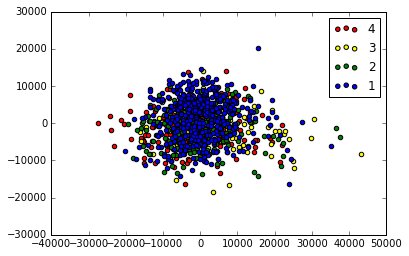

In [56]:
train = pd.read_csv("../data/train.csv")
df = pd.DataFrame({"x": X[:, 0], "y": X[:, 1]})
df["label"] = train["label"][:1000]
del train

colors = ["red", "yellow", "green" , "blue"]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    pl.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
pl.legend()
pl.show()

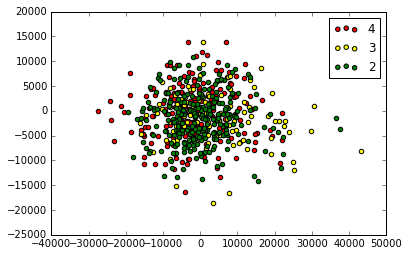

In [57]:
df = df[df.label != 1]
colors = ["red", "yellow", "green" , "blue"]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    pl.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
pl.legend()
pl.show()

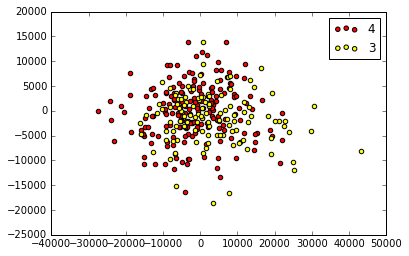

In [58]:
df = df[df.label != 2]
colors = ["red", "yellow", "green" , "blue"]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    pl.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
pl.legend()
pl.show()

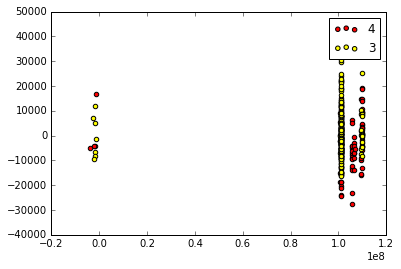

In [59]:
from sklearn.decomposition import RandomizedPCA
import pylab as pl
pca = RandomizedPCA(n_components=1)
X = pca.fit_transform(data_np[:1000,:])


train = pd.read_csv("../data/train.csv")
df = pd.DataFrame({"y": X[:, 0]})
df["label"] = train["label"][:1000]
df["x"] = train["Id"][:1000]
del train

df = df[df.label != 2]
df = df[df.label != 1]
colors = ["red", "yellow", "green" , "blue"]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    pl.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
pl.legend()
pl.show()

In [64]:
from sklearn import decomposition
train = data_np[:1000,:]
data = pd.read_csv("../data/train.csv")
target = data["label"][:1000]

del data


pca_components = [1, 2, 3, 4, 5, 10, 20, 25, 30, 50, 70, 100]
pca_fits = []

for comp_size in pca_components:
    print ("Fitting pca with %d components" % comp_size)
    pca_fits.append(decomposition.PCA(n_components=comp_size).fit(train))


Fitting pca with 1 components
Fitting pca with 2 components
Fitting pca with 3 components
Fitting pca with 4 components
Fitting pca with 5 components
Fitting pca with 10 components
Fitting pca with 20 components
Fitting pca with 25 components
Fitting pca with 30 components
Fitting pca with 50 components
Fitting pca with 70 components
Fitting pca with 100 components


NameError: name 'plt' is not defined

(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)
(1, 150300)


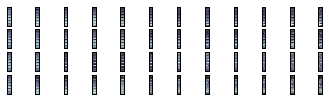

In [83]:
import matplotlib.pyplot as plt
from matplotlib import cm
figure = plt.figure()

t = np.array(target)

choosen_numbers = []


choosen_numbers.append(np.argwhere(t == 1)[-3])
choosen_numbers.append(np.argwhere(t == 2)[-3])
choosen_numbers.append(np.argwhere(t == 3)[-3])
choosen_numbers.append(np.argwhere(t == 4)[-3])

pca_index = 1
for n in choosen_numbers:
    for p in pca_fits:
        transformed = p.transform(train[n])

        reconstructed = p.inverse_transform(transformed)
        print (reconstructed.shape)
        f = figure.add_subplot(10, len(pca_components), pca_index).imshow(np.reshape(reconstructed, (900, 167)), interpolation='nearest', cmap='bone')
        for xlabel_i in f.axes.get_xticklabels():
            xlabel_i.set_visible(False)
            xlabel_i.set_fontsize(0.0)
        for xlabel_i in f.axes.get_yticklabels():
            xlabel_i.set_fontsize(0.0)
            xlabel_i.set_visible(False)
        for tick in f.axes.get_xticklines():
            tick.set_visible(False)
        for tick in f.axes.get_yticklines():
            tick.set_visible(False)
        pca_index += 1

plt.show()

In [84]:
# détection de contours avec OpenCV
import cv2
test_img = "../roof_images/914296300.jpg"
im = cv2.imread(test_img)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

ImportError: No module named 'cv2'